# Séance 3 : Fonctions de deux variables : extrema

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

On considère la fonction 
\begin{equation}
f(x,y) = x^3 + 3xy^2 - 15 x - 12 y.
\end{equation}

In [2]:
def f(x, y):
    return x*x*x + 3*x*y*y - 15*x - 12*y

## Représentation

Reprise du TP1 : tracé de cette surface

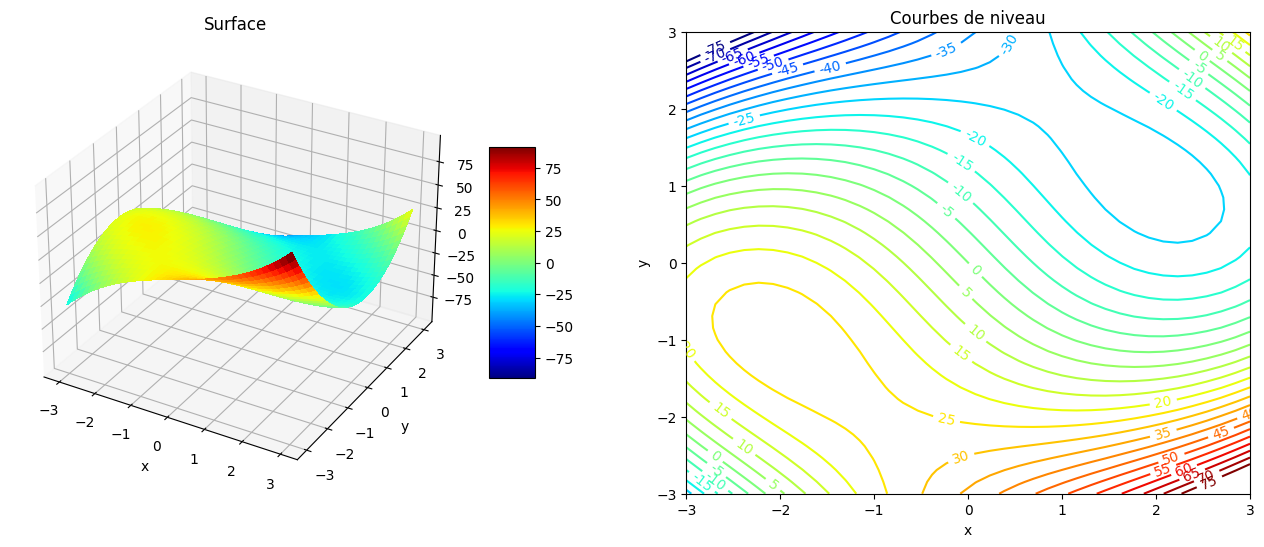

In [3]:
xmin, xmax = -3, 3
ymin, ymax = -3, 3
# X et Y comme vecteurs
x = np.linspace(xmin, xmax, 40)
y = np.linspace(ymin, ymax, 40)
# X et Y comme matrices
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
cmap = plt.get_cmap('jet')

plt.figure(1,figsize=(16,6))
plt.subplot(1,2,1,projection='3d')
surff = plt.gca().plot_surface(X, Y, Z, rstride=1, cstride=1, 
                               cmap=cmap, linewidth=0, antialiased=False)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(surff, shrink=0.5, aspect=5)
plt.title('Surface')
plt.subplot(1,2,2)
cont = plt.contour(X, Y, Z, np.linspace(-75,75,31), cmap=cmap)
plt.clabel(cont, fmt='%d')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Courbes de niveau');

## &Eacute;tude des points critiques

### Détermination des points critiques

Pour trouver les points critiques, on a besoin de déterminer les annulations du gradient :
\begin{equation}
\nabla f(x,y) = \begin{pmatrix}
\dfrac{\partial f}{\partial x}(x,y) \\
\dfrac{\partial f}{\partial y}(x,y)
\end{pmatrix}
= \begin{pmatrix}
3x^2 + 3y^2 - 15 \\[10pt] 
6xy -12\end{pmatrix}.
\end{equation}


In [4]:
def gradf(x,y):
    return [3*x*x + 3*y*y - 15, 6*x*y - 12]

En traçant la ligne de niveau 0 des dérivées premières, on peut déterminer graphiquement le lieu des points critiques.
On fait attention dans la représentation d'avoir des échelles égales sur les axes pour que le cercle soit un cercle.

Lien : [axis](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html)

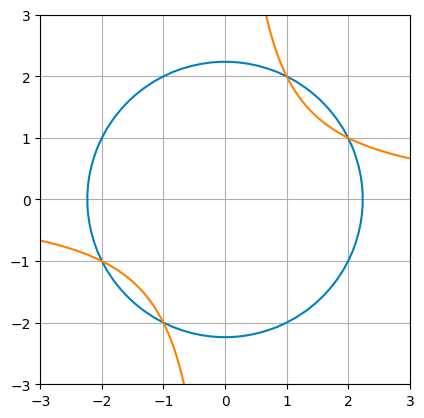

In [5]:
Zx = gradf(X, Y)[0]
Zy = gradf(X, Y)[1]
winter = plt.get_cmap('winter')
autumn = plt.get_cmap('autumn')
plt.contour(X, Y, Zx.T, 0, cmap=winter)
plt.contour(X, Y, Zy.T, 0, cmap=autumn)
plt.axis('scaled')
plt.grid()

Les points critiques, intersections d'un cercle et d'une parabole, semblent être $(1,2)$, $(2,1)$, $(-1,-2)$ et $(-2,-1)$. Vérifions le.

In [6]:
Pc = np.array([[1,2], [2,1], [-1,-2], [-2,-1]])

for i in range(len(Pc)):
    print(gradf(*tuple(Pc[i])))

[0, 0]
[0, 0]
[0, 0]
[0, 0]


### Nature des points critiques

Pour étudier la nature des points critiques, on a besoin des différentielles secondes, réunies dans la hessienne.
\begin{equation}
H(f)(x,y) 
= \begin{pmatrix}
\dfrac{\partial^2 f}{\partial x^2}(x,y) & \dfrac{\partial^2 f}{\partial x\partial y}(x,y) \\
\dfrac{\partial^2 f}{\partial x\partial y}(x,y) & \dfrac{\partial^2 f}{\partial y^2}(x,y)
\end{pmatrix} 
= \begin{pmatrix} 6x & 6y \\[10pt] 6y & 6x \end{pmatrix}.
\end{equation}

In [7]:
def Hf(x,y):
    return [[6*x, 6*y], [6*y, 6*x]]

for i in range(len(Pc)):
    print(np.linalg.eigvals(Hf(*tuple(Pc[i]))))

[18. -6.]
[18.  6.]
[  6. -18.]
[ -6. -18.]


Au vu des signes des valeurs propres, 
* le point (1,2) est un point selle,
* le point (2,1) est un minimum,
* le point (-1,-2) est un point selle,
* le point (-2,-1) est un maximum.

On trace à nouveau la surface en zoomant autour des points d'intérêt.

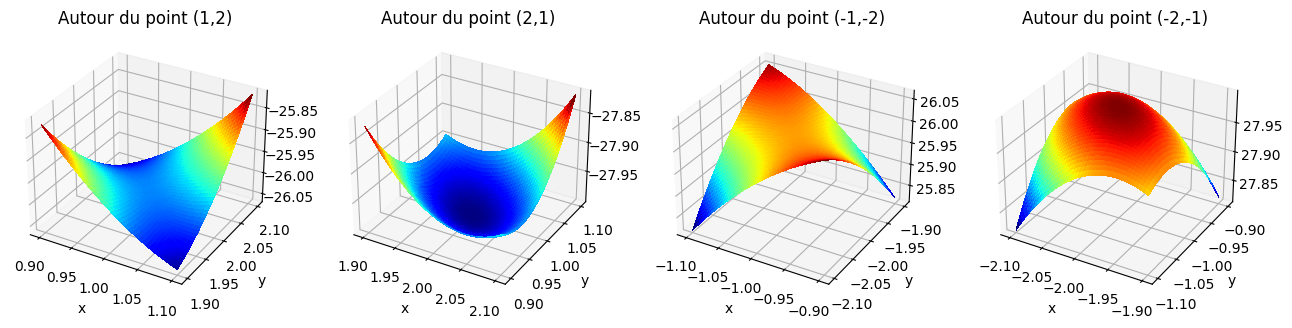

In [8]:
plt.figure(1,figsize=(16,4))

for i in range(len(Pc)):
    plt.subplot(1,4,i+1,projection='3d')
    x1 = np.linspace(Pc[i,0]-.1, Pc[i,0]+.1, 40)
    y1 = np.linspace(Pc[i,1]-.1, Pc[i,1]+.1, 40)
    X1, Y1 = np.meshgrid(x1, y1)
    Z1 = f(X1, Y1)
    surf1 = plt.gca().plot_surface(X1, Y1, Z1, rstride=1, cstride=1, 
                                   cmap=cmap, linewidth=0, antialiased=False)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(surff, shrink=0.5, aspect=5)
    plt.title(f'Autour du point ({Pc[i,0]},{Pc[i,1]})')